<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW4_woodenML_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 4 (pro): древесные алгоритмы**

### **Постановка задач**

### **Домашнее задание состоит из двух подзадач:**

**1. В  разделе 1 ваша задача:**
-  реализовать свое решающее дерево
- сравнить его со стандартной имплементацией из sklearn

Функции и классы дерева вы должны оформить в модуль `hw4_code_pro.py`.

**2. В разделе два ваша задача:** решить задачу бинарной классификации при помощи написанного Вами дерева, а также леса из sklearn, а после интерпретировать лучшие модели. Чуть точнее

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT, а также RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**
- Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.
- Неэффективная реализация кода может негативно отразиться на оценке.

### **Формат сдачи:**
Задания сдаются через  anytask. Посылка должна содержать:
* Ноутбук в формате ipynb
* Модуль hw4_code_pro.py


### **Баллы:**

Суммарно за задание можно получить 10 основных баллов и 1 бонусный балло.

Оценка за ДЗ = min{ваш балл, 10}

Мягкий дедлайн: 2 февраля 23:59

**Продуктивной и интересной вам работы!**


In [1]:
!pip install optuna
!pip install lime
!pip install shap
!pip install psycopg2-binary

   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   ------------ --------------------------- 122.9/383.6 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------  378.9/383.6 kB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 383.6/383.6 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/231.8 kB ? eta -:--:--
   ---------------------------------------- 231.8/231.8 kB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.6/2.1 MB 12.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.1 MB 13.5 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/298.9 kB ? eta -:--:--
   -----------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ochir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ochir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/275.7 kB 217.9 kB/s eta 0:00:02
     --------- --------------------------- 71.7/275.7 kB 558.5 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB 5.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/12.8 MB 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ochir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 487.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.2 MB 1.0 MB/s eta 0:00:02
   --------------- ------------------------ 0.4/1.2 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 0.9/1.2 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ochir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import psycopg2
import psycopg2.extras

import shap
import lime
import lime.lime_tabular

import optuna

import pickle

import warnings
warnings.filterwarnings('ignore')

# **1. Решающие деревья своими руками (6 баллов)**

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Всего за часть вы можете получить 6 основных баллов и 1 бонусный.

### **Задание 1. (1 балл)**

Реализуйте функцию find_best_split из модуля hw4_code_pro.py

$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$
$R$ — множество объектов, $R_l$ и $R_r$ 
$H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ 

### **Задание 2. (0.25 балла)**

Загрузите таблицу [students.csv](https://github.com/AnastasiyaMax/MLDS_ml_course_fall21/blob/main/hw/hw5_trees/students.csv). Это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling).

В наборе данных:
- признаки объекта записаны в первых пяти столбцах;
- в последнем записана целевая переменная (класс: 0 или 1).

По этим данным, используя функцию из задания 1, постройте:
- пять кривых "порог — значение критерия Джини" для всех пяти признаков;
- scatter-графики "значение признака — класс" для всех пяти признаков;

In [4]:
df = pd.read_csv("students.csv")

In [5]:
from hw4_code_pro import find_best_split

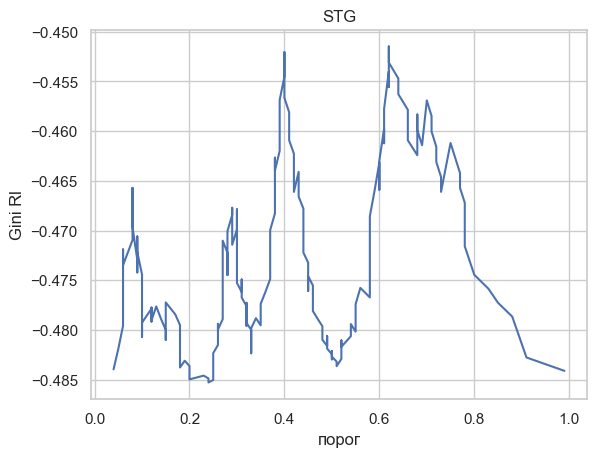

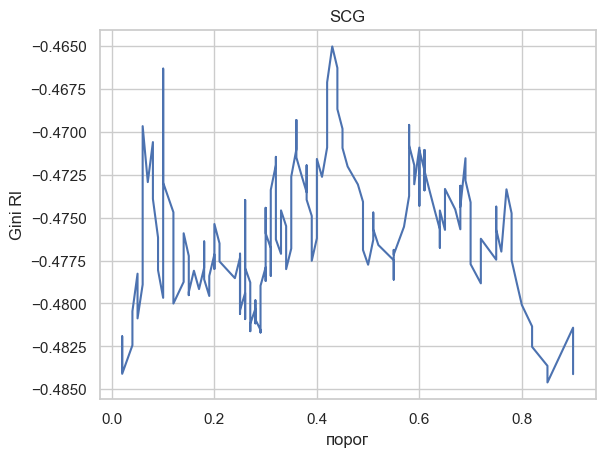

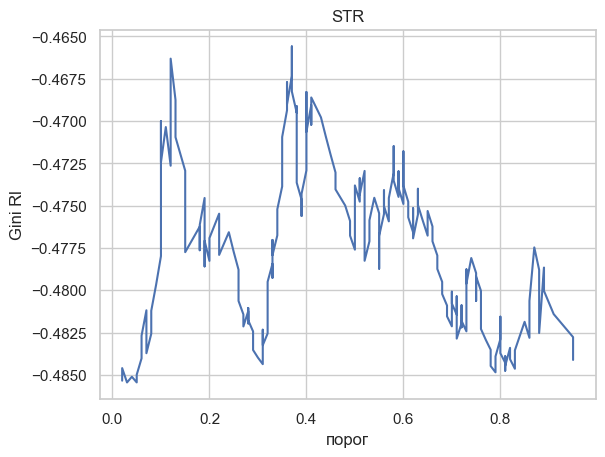

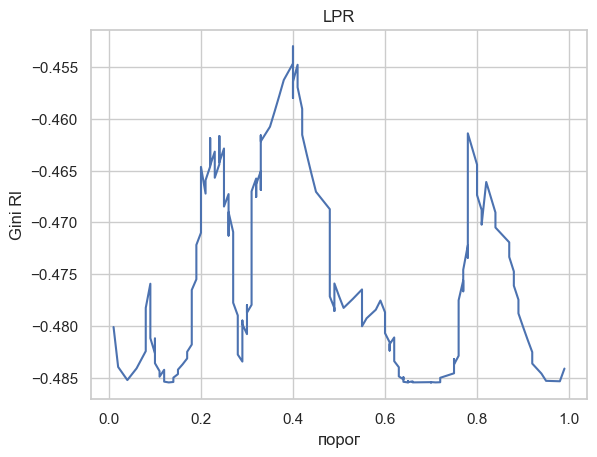

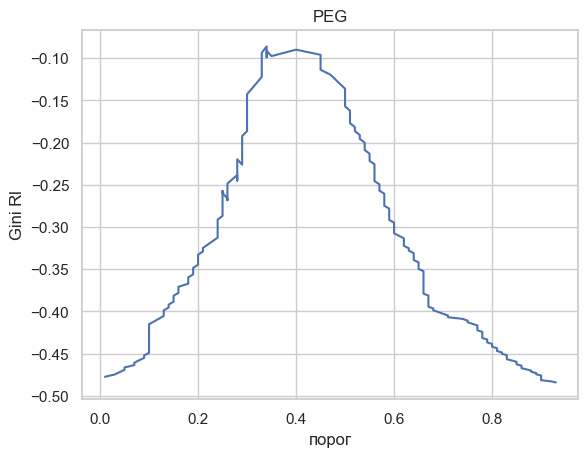

In [11]:
for col in df.columns[:-1]:
    thresholds, Gini, _, _ = find_best_split(df[col].to_numpy(), df["UNS"].to_numpy())
    plt.title(col)
    plt.xlabel("порог")
    plt.ylabel("Gini Rl")
    plt.plot(np.squeeze(thresholds[1:]), np.squeeze(Gini))
    plt.show()

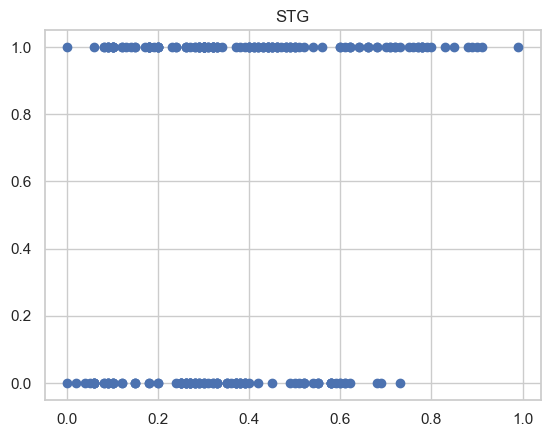

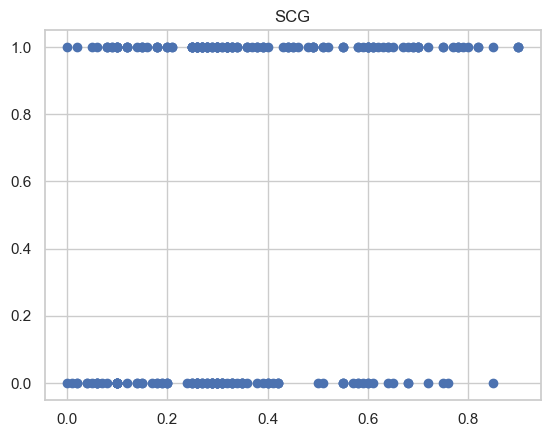

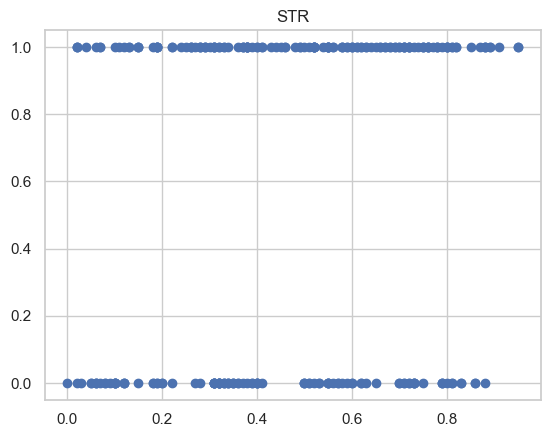

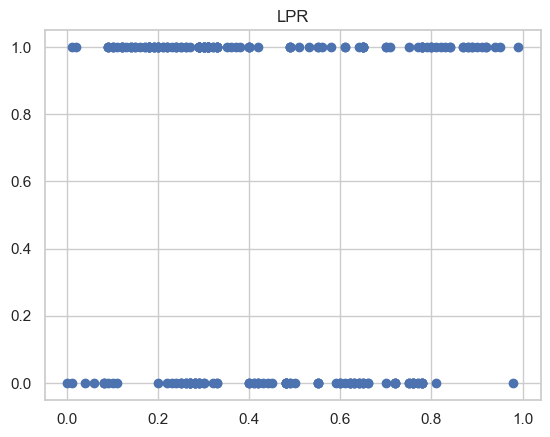

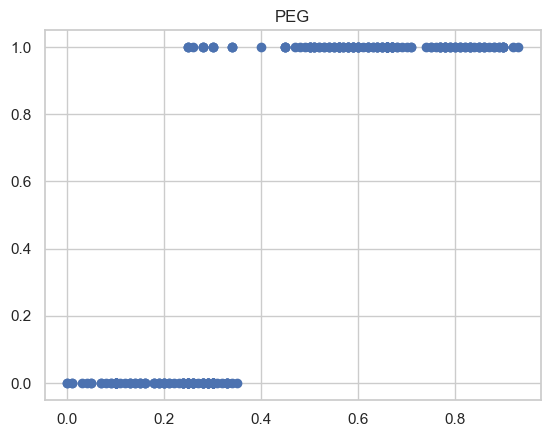

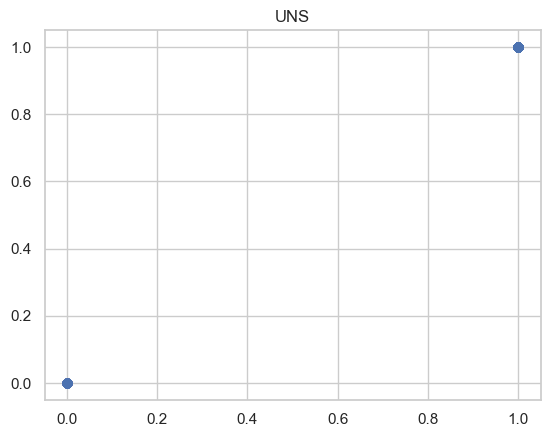

In [12]:
for col in df.columns:
    plt.title(col)
    plt.scatter(x=df[col], y=df["UNS"])
    plt.show()

### **Задание 3. (0.6 балла)**

Проанализируйтте построенные кривые. Ответьте на поставленные вопросы:
- По какому признаку нужно производить деление выборки на два поддерева? (0.15 балла)
- Согласуется ли этот результат с визуальной оценкой scatter-графиков? (0.15 балла)
- Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? (0.15 балла)
- Чем отличаются кривые для признаков, по которым деление практически невозможно? (0.15 балла)

**Ответ:**
1. По признаку PEG
2. Да, согласуется
3. Кривая таких признаков стремится к нормальному распределению
4. Кривые для "плохих" похожи на случайное распределение т.к. для любого порога имеется достаточное кол-во объектов обоих классов

### **Задание 4. (1.15 балла)**

В некоторых случаях необходимо анализировать код исполненного класса на предмет оптимальности и ошибок. Потренируйтесь в этом!

- Разберитесь с уже написанным кодом в классе DecisionTree модуля hw4_code_pro.py.
- Найдите ошибки в реализации метода \_fit_node.
- Напишите функцию \_predict_node.

**Примечание 1:**

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева».
- Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Примечание 2:**

- Выбор лучшего разбиения необходимо производить по критерию Джини.
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку, чтобы Джини упал
- Ответ в листе: наиболее часто встречающийся класс в листе.


### **Задание 5. (0.5 балла)**

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Для этого:

- Скачайте таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/))
- Прочитайте данные с помощью pandas
- Примените к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа.
- Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные)
- Сделайте предсказания для оставшейся половины.
- Вычислите accuracy (так как мы используем эту метрику и в силу задачи, нам не очень важно, что будет классом 1, а что — классом 0).  


У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("agaricus-lepiota.data")

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df["p"] = df["p"].apply(lambda x: 1 if x == "e" else 0)

In [17]:
encoder = LabelEncoder()

for column in df.columns[1:]:
    df[column] = encoder.fit_transform(df[column])

In [18]:
train_x, test_x, train_y, test_y = train_test_split(df.drop("p", axis=1), df["p"], random_state=0, test_size=0.5)

In [19]:
from hw4_code_pro import DecisionTree

In [20]:
feature_types = ["categorical"] * 22

tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
tree.fit(train_x.to_numpy(), train_y.to_numpy())

DecisionTree(feature_types=['categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical'],
             min_samples_split=3)

In [21]:
preds = tree.predict(test_x.to_numpy())

sum((preds == test_y)) / test_y.size    

1.0

### **Задание 6. (бонус, 1 балл)**

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующее задание).

### **Задание 7. (2 балла)**

**1. Загрузите следующие наборы данных** (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**2. Закодируйте категориальные признаки, использовав LabelEncoder.** С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации:**
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами.

In [22]:
import requests
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
# URL файла, который нужно скачать
urls = [('agaricus-lepiota.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'),
       ('tic-tac-toe.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'),
       ('car.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'),
       ('nursery.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')]

for name, url in urls:
    response = requests.get(url)

    with open(name, 'wb') as file:
        file.write(response.content)

In [25]:
features = list("feature_" + str(i) for i in range(22))
agaricus_lepiota = pd.read_csv("agaricus-lepiota.data", names=["target"] + features)
features = list("feature_" + str(i) for i in range(9))
tic_tac_toe = pd.read_csv("tic-tac-toe.data", names=features + ["target"])
features = list("feature_" + str(i) for i in range(6))
car = pd.read_csv("car.data", names=features + ["target"])
features = list("feature_" + str(i) for i in range(8))
nursery = pd.read_csv("nursery.data", names=features + ["target"])

In [26]:
agaricus_lepiota_X, agaricus_lepiota_y = agaricus_lepiota.drop("target", axis=1), agaricus_lepiota["target"]
tic_tac_toe_X, tic_tac_toe_y = tic_tac_toe.drop("target", axis=1), tic_tac_toe["target"]
car_X, car_y = car.drop("target", axis=1), car["target"]
nursery_X, nursery_y = nursery.drop("target", axis=1), nursery["target"]

for col in agaricus_lepiota_X.columns:
    agaricus_lepiota_X[col] = encoder.fit_transform(agaricus_lepiota_X[col])
for col in tic_tac_toe_X.columns:
    tic_tac_toe_X[col] = encoder.fit_transform(tic_tac_toe_X[col])
for col in car_X.columns:
    car_X[col] = encoder.fit_transform(car_X[col])
for col in nursery_X.columns:
    nursery_X[col] = encoder.fit_transform(nursery_X[col])

In [27]:
agaricus_lepiota_y = agaricus_lepiota_y.apply(lambda x: 1 if x == "e" else 0)
tic_tac_toe_y = tic_tac_toe_y.apply(lambda x: 1 if x == "positive" else 0)
car_y = car_y.apply(lambda x: 1 if (x == "good") or (x == "vgood") else 0)
nursery_y = nursery_y.apply(lambda x: 1 if x in ["very_recom", "priority", "spec_prior"] else 0)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from hw4_code_pro import DecisionTree
from sklearn.metrics import accuracy_score

In [30]:
df = pd.DataFrame(columns=["DecisionTree_real", "DecisionTree_categorical", "DecisionTree_real_ohe_hot", "DecisionTreeClassifier"],
                  index=["agaricus_lepiota", "tic_tac_toe", "car", "nursery"])

In [33]:
feature_types = ["real"] * agaricus_lepiota_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, agaricus_lepiota_X.to_numpy(), agaricus_lepiota_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["agaricus_lepiota", "DecisionTree_real"] = res

feature_types = ["real"] * tic_tac_toe_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, tic_tac_toe_X.to_numpy(), tic_tac_toe_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["tic_tac_toe", "DecisionTree_real"] = res

feature_types = ["real"] * car_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, car_X.to_numpy(), car_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["car", "DecisionTree_real"] = res

feature_types = ["real"] * nursery_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, nursery_X.to_numpy(), nursery_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["nursery", "DecisionTree_real"] = res

In [34]:
feature_types = ["categorical"] * agaricus_lepiota_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, agaricus_lepiota_X.to_numpy(), agaricus_lepiota_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["agaricus_lepiota", "DecisionTree_categorical"] = res

feature_types = ["categorical"] * tic_tac_toe_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, tic_tac_toe_X.to_numpy(), tic_tac_toe_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["tic_tac_toe", "DecisionTree_categorical"] = res

feature_types = ["categorical"] * car_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, car_X.to_numpy(), car_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["car", "DecisionTree_categorical"] = res

feature_types = ["categorical"] * nursery_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, nursery_X.to_numpy(), nursery_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["nursery", "DecisionTree_categorical"] = res

In [35]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

agaricus_lepiota_one_hot_X = one_hot_encoder.fit_transform(agaricus_lepiota_X)
tic_tac_toe_one_hot_X = one_hot_encoder.fit_transform(tic_tac_toe_X)
car_one_hot_X = one_hot_encoder.fit_transform(car_X)
nursery_one_hot_X = one_hot_encoder.fit_transform(nursery_X)

In [36]:
feature_types = ["real"] * agaricus_lepiota_one_hot_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, agaricus_lepiota_one_hot_X, agaricus_lepiota_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["agaricus_lepiota", "DecisionTree_real_ohe_hot"] = res
print(df.loc["agaricus_lepiota", "DecisionTree_real_ohe_hot"])

feature_types = ["real"] * tic_tac_toe_one_hot_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, tic_tac_toe_one_hot_X, tic_tac_toe_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["tic_tac_toe", "DecisionTree_real_ohe_hot"] = res
print(df.loc["tic_tac_toe", "DecisionTree_real_ohe_hot"])

feature_types = ["real"] * car_one_hot_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, car_one_hot_X, car_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["car", "DecisionTree_real_ohe_hot"] = res
print(df.loc["car", "DecisionTree_real_ohe_hot"])

feature_types = ["real"] * nursery_one_hot_X.shape[1]
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)
res = cross_val_score(tree, nursery_one_hot_X, nursery_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["nursery", "DecisionTree_real_ohe_hot"] = res
print(df.loc["nursery", "DecisionTree_real_ohe_hot"])

[0.7282127  0.99889217 0.9844904 ]
[0.146875   0.         0.06583072]
[0.87673611 0.85069444 0.78472222]
[0.99953704 0.99930556 0.99930556]


In [38]:
tree_classifier = DecisionTreeClassifier(min_samples_split=3)
res = cross_val_score(tree_classifier, agaricus_lepiota_one_hot_X, agaricus_lepiota_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["agaricus_lepiota", "DecisionTreeClassifier"] = res

tree_classifier = DecisionTreeClassifier(min_samples_split=3)
res = cross_val_score(tree_classifier, tic_tac_toe_one_hot_X, tic_tac_toe_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["tic_tac_toe", "DecisionTreeClassifier"] = res

tree_classifier = DecisionTreeClassifier(min_samples_split=3)
res = cross_val_score(tree_classifier, car_one_hot_X, car_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["car", "DecisionTreeClassifier"] = res

tree_classifier = DecisionTreeClassifier(min_samples_split=3)
res = cross_val_score(tree_classifier, nursery_one_hot_X, nursery_y.to_numpy(), cv=3, scoring="accuracy")
df.loc["nursery", "DecisionTreeClassifier"] = res

In [ ]:
model = DecisionTreeClassifier(criterion='gini', min_samples_split=3)

res = cross_val_score(model, agaricus_lepiota_X.to_numpy(), agaricus_lepiota_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["agaricus_lepiota", "DecisionTreeClassifier"] = res

res = cross_val_score(model, tic_tac_toe_X.to_numpy(), tic_tac_toe_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["tic_tac_toe", "DecisionTreeClassifier"] = res

res = cross_val_score(model, car_X.to_numpy(), car_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["car", "DecisionTreeClassifier"] = res

res = cross_val_score(model, nursery_X.to_numpy(), nursery_y.to_numpy(), cv=10, scoring="accuracy")
df.loc["nursery", "DecisionTreeClassifier"] = res

In [51]:
df

,DecisionTree_real,DecisionTree_categorical,DecisionTree_real_ohe_hot,DecisionTreeClassifier
agaricus_lepiota,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9926108374384...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.7282127031019202, 0.9988921713441654, 0.984...","[0.6851168511685117, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
tic_tac_toe,"[0.3020833333333333, 0.9166666666666666, 0.875...","[0.3125, 0.7916666666666666, 0.84375, 0.354166...","[0.146875, 0.0, 0.06583072100313479]","[0.8020833333333334, 0.71875, 0.53125, 0.84375..."
car,"[1.0, 1.0, 0.9884393063583815, 1.0, 1.0, 0.930...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8439306358381...","[0.8767361111111112, 0.8506944444444444, 0.784...","[0.9248554913294798, 0.953757225433526, 0.9248..."
nursery,"[0.9984567901234568, 1.0, 0.9976851851851852, ...","[0.9984567901234568, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.999537037037037, 0.9993055555555556, 0.9993...","[0.9984567901234568, 1.0, 0.9976851851851852, ..."


In [52]:
df.applymap(lambda x: x.mean())

,DecisionTree_real,DecisionTree_categorical,DecisionTree_real_ohe_hot,DecisionTreeClassifier
agaricus_lepiota,0.999261,1.000000,0.903865,0.956689
tic_tac_toe,0.711634,0.589759,0.070902,0.795647
car,0.928162,0.954211,0.837384,0.940973
nursery,0.999614,0.999846,0.999383,0.999614


### **Задание 8. (0.5 балла)**

Проанализируйте результаты эксперимента. Ответьте на вопросы:
- Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.
- Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
- Если случайность есть, то можно ли повлиять на нее и улушить работу алгоритмов?

In [42]:
agaricus_lepiota_X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [33]:
nursery_y.value_counts()

target
1    8638
0    4322
Name: count, dtype: int64

In [35]:
agaricus_lepiota_y.value_counts()

target
1    4208
0    3916
Name: count, dtype: int64

In [44]:
tic_tac_toe_X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2
954,1,2,1,2,2,1,2,1,2
955,1,2,1,2,1,2,2,1,2
956,1,2,1,1,2,2,2,1,2


**Ответ:** 
1) при вызове cross_val_score без параметра shuffle=False мы всегда разбиваем данные на одни и те же части => точность разных алгоритмов зависит
только от сложности разбиения данных из-за чего почти все датасеты ранжируются одинаково на разных алгоритмах
2) Во всех данных признаки кодируются одинаково в зависимости от порядка появления значений.

# **2. Задача бинарной классификации реализованным деревом (4 балла)**

Всего за эту часть можно получить 4 балла.

В этом разделе вам необходимо решить задачу бинарной классификации самописным деревом и лесом из sklearn, а после интерпретировать лучшие модели. А именно:

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT и RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Познакомимся с задачей: постановка**

У вас есть данные о полетах, обладающие следущими характеристиками:
- Для **каждого** клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета.
- Для **некоторых** клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied).

По данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, **для которых ответ неизвестен.**

### **Получение данных:**

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

In [16]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/AppData/Roaming/postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

�訡�� � ᨭ⠪�� �������.


### **Задание 9. Получение данных (0.5 балла)**

- Подключитесь к БД при помощи `psycopg2.connect()`
- Напишите SQL-запрос, объединяющий 3 нужные таблицы в одну
- Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'.

Список столбцов таблиц добудьте самостоятельно.


**Примечание:**
 Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

##### **Параметры соединения:**
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write```
```

##### **Схема БД**

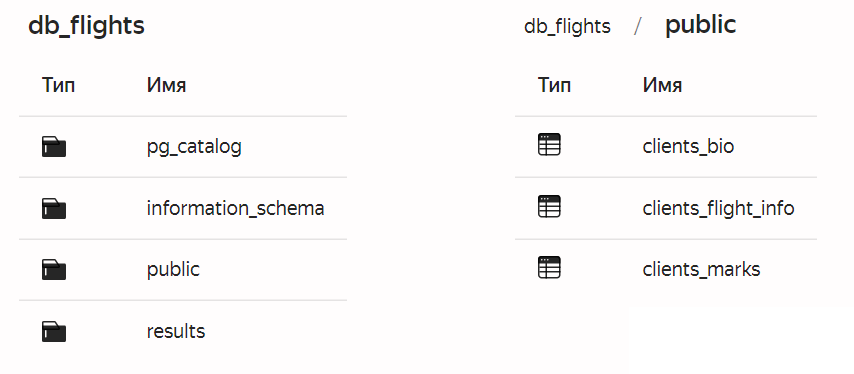

In [53]:
with  psycopg2.connect(host="rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net", 
                       port=6432,
                       sslmode="verify-full", 
                       dbname="db_flights",
                       user="mlhs_student",
                       password="mlhs_student",
                       target_session_attrs="read-write",
                       ) as connection:
    query = "SELECT * FROM clients_bio JOIN clients_flight_info ON clients_bio.id=clients_flight_info.id JOIN clients_marks ON clients_bio.id=clients_marks.id"
    df = pd.read_sql_query(query, connection)

In [54]:
df.columns

Index(['id', 'gender', 'age', 'id', 'Customer Type', 'Type of Travel', 'class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'id', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'cleanliness', 'satisfaction'],
      dtype='object')

In [55]:
df = df.iloc[:, 0:3].merge(df.iloc[:, 3:10], on="id", how="inner").merge(df.iloc[:, 10:], on="id", how="inner")

In [56]:
df.set_index(keys="id", inplace=True)

In [57]:
assert df.shape == (129_549, 23)

Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука.

In [58]:
df_train = df[df.satisfaction != '-']

df_train.head()

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
7,Male,43.0,Loyal Customer,Business travel,Business,1963.0,0.0,0.0,3.0,3.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,satisfied
13,Male,24.0,disloyal Customer,Business travel,Eco,453.0,16.0,30.0,2.0,2.0,...,2.0,5.0,5.0,2.0,4.0,4.0,2.0,4.0,5.0,neutral or dissatisfied
18,Female,61.0,Loyal Customer,Personal Travel,Eco,821.0,0.0,0.0,2.0,5.0,...,1.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,neutral or dissatisfied
31,Male,35.0,disloyal Customer,Business travel,Business,212.0,0.0,0.0,2.0,2.0,...,2.0,2.0,2.0,4.0,5.0,5.0,5.0,4.0,2.0,neutral or dissatisfied
39,Female,46.0,Loyal Customer,Business travel,Business,67.0,0.0,0.0,3.0,3.0,...,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,satisfied


In [59]:
assert df_train.shape == (103_644, 23)

In [60]:
df_test = df[df.satisfaction == '-'].drop('satisfaction', axis=1)
df_test.head()

,gender,age,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
id,,,,,,,,,,,,,,,,,,,,,
55,Male,36.0,Loyal Customer,Business travel,Business,3655.0,40.0,71.0,1.0,1.0,...,1.0,3.0,3.0,3.0,3.0,3.0,1.0,4.0,3.0,2.0
79,Female,70.0,Loyal Customer,Personal Travel,Eco,108.0,50.0,41.0,5.0,4.0,...,4.0,4.0,4.0,3.0,3.0,0.0,3.0,5.0,3.0,5.0
126,Male,66.0,Loyal Customer,Personal Travel,Eco,562.0,88.0,84.0,2.0,5.0,...,5.0,2.0,5.0,5.0,3.0,5.0,2.0,5.0,5.0,5.0
199,Female,60.0,Loyal Customer,Business travel,Business,3756.0,36.0,24.0,4.0,4.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0
263,Male,43.0,Loyal Customer,Personal Travel,Business,802.0,0.0,0.0,1.0,2.0,...,2.0,3.0,3.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0


In [61]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид.

In [62]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction, test_size=0.3, random_state=42)

In [63]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)

### **Задание 10 (0.25 балла)**

- Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)
- Заполните пропуски в данных наиболее часто встречающимся значением.
Помните про правильность заполнения.
- Выведите основные статистики по числовым и категориальным столбцам таблицы
- Сделайте **текстовый** вывод о распределениях значений признаков

In [64]:
for col in X_train.select_dtypes(include='object').columns:
    try:
        X_train[col] = X_train[col].astype(float)
    except:
        print("X_train", col, "is not numeric")

for col in X_val.select_dtypes(include='object').columns:
    try:
        X_val[col] = X_val[col].astype(float)
    except:
        print("X_val", col, "is not numeric")

X_train gender is not numeric
X_train Customer Type is not numeric
X_train Type of Travel is not numeric
X_train class is not numeric
X_val gender is not numeric
X_val Customer Type is not numeric
X_val Type of Travel is not numeric
X_val class is not numeric


In [65]:
import seaborn as sns

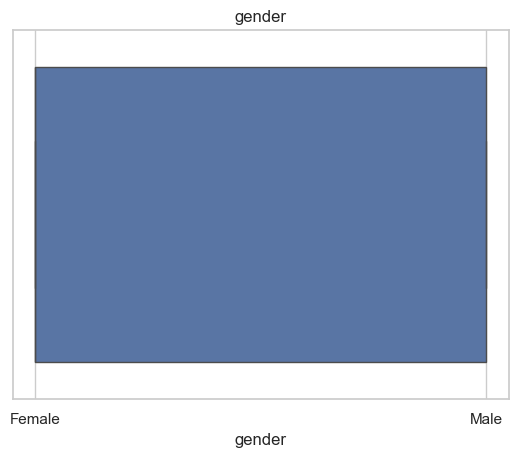

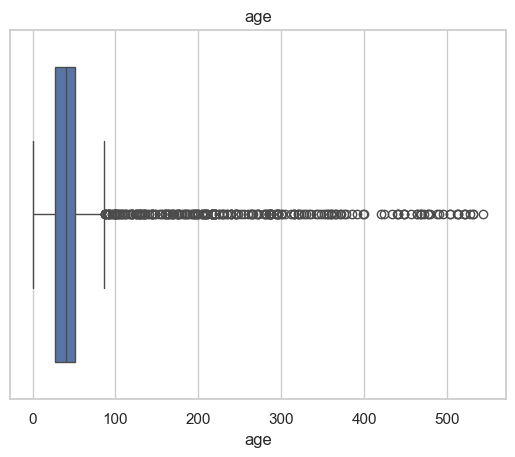

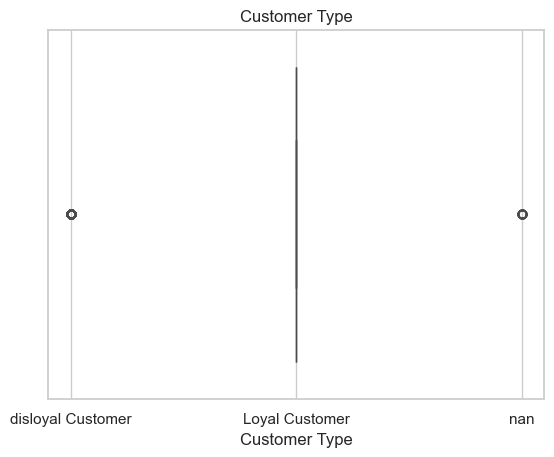

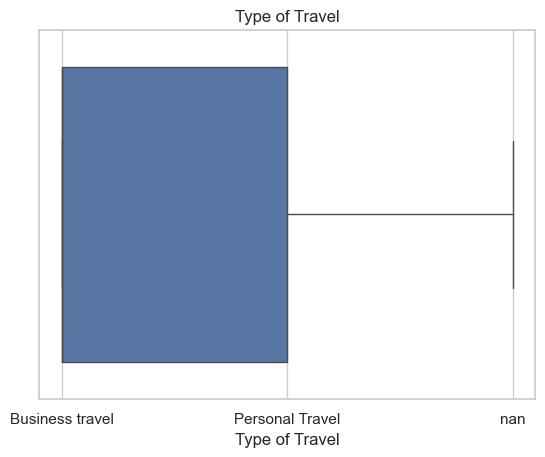

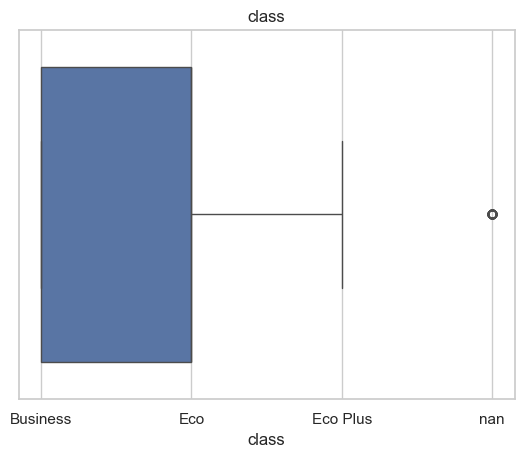

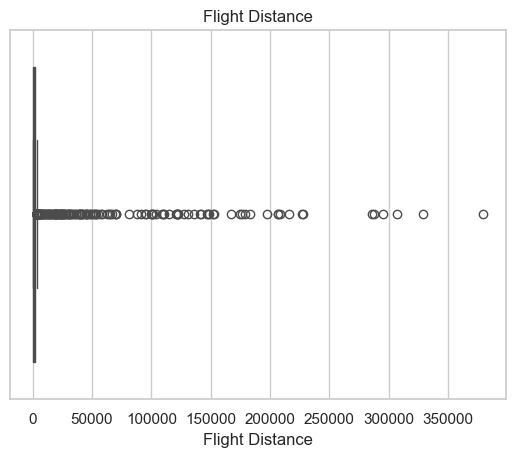

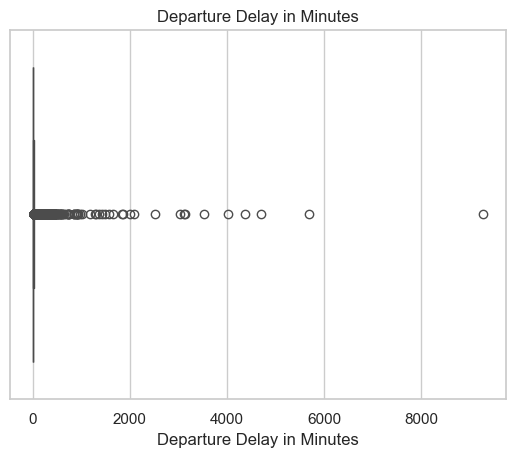

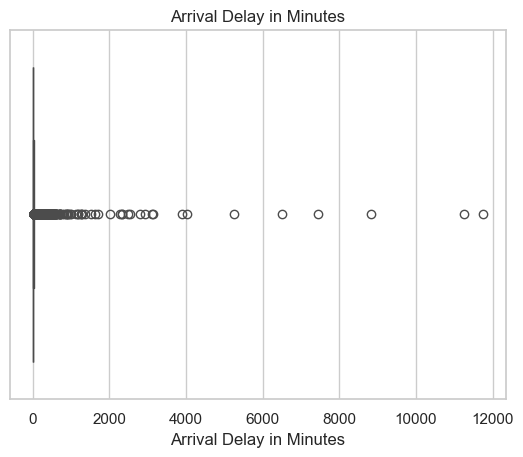

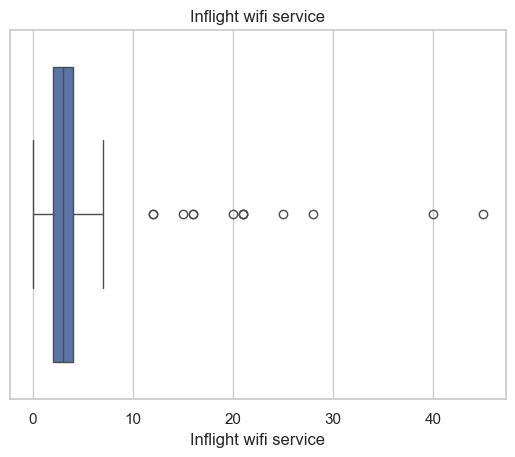

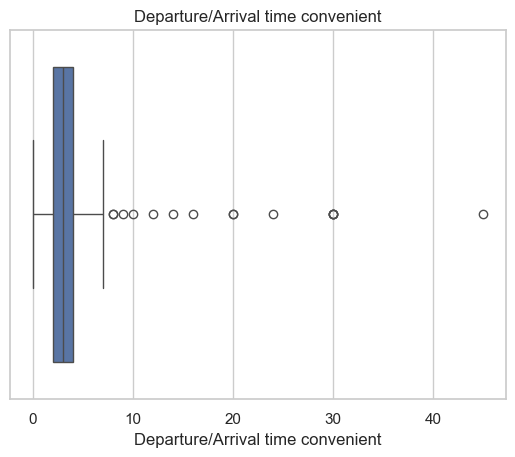

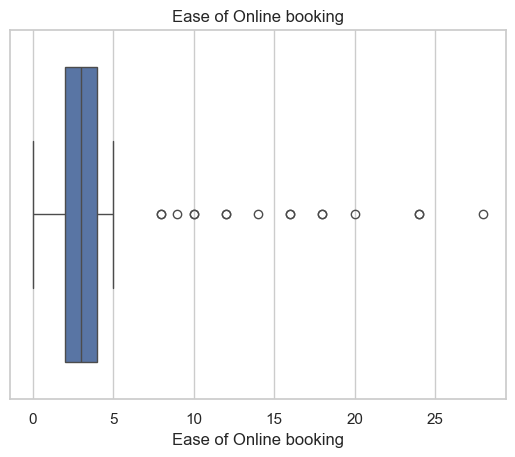

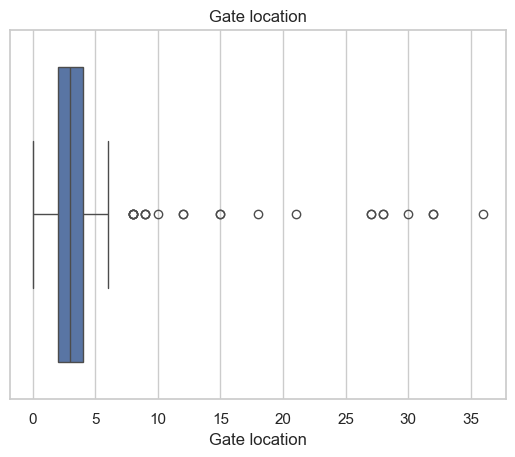

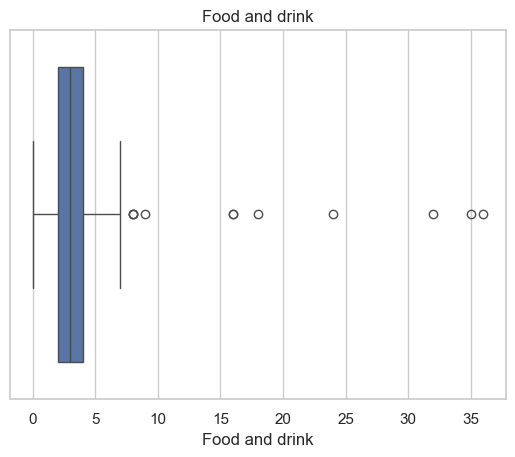

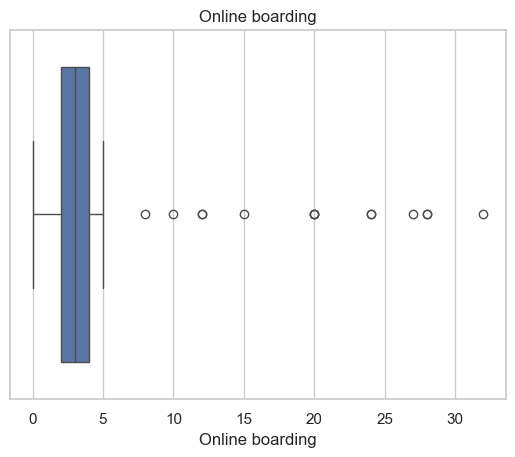

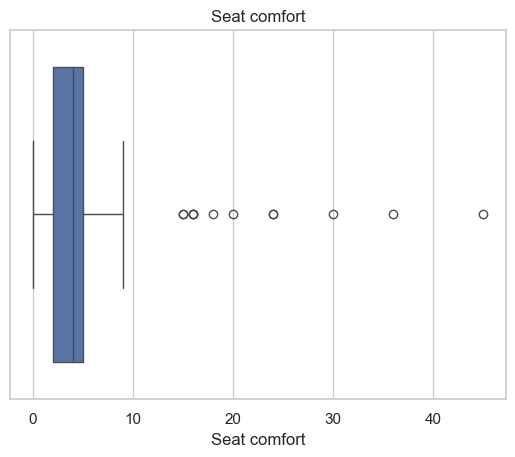

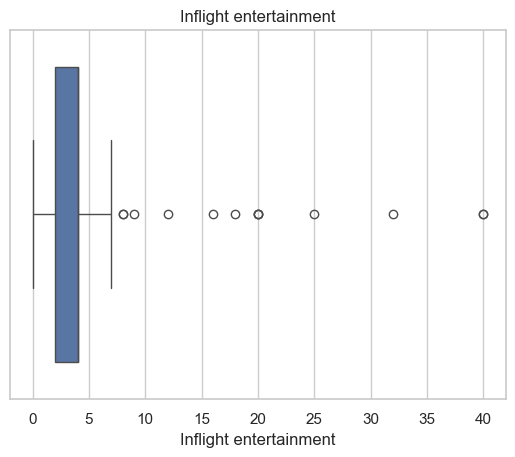

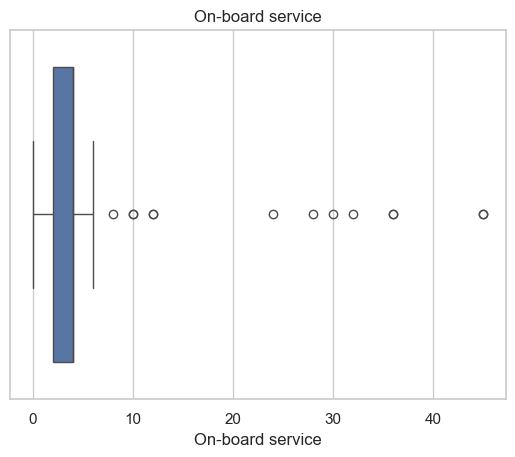

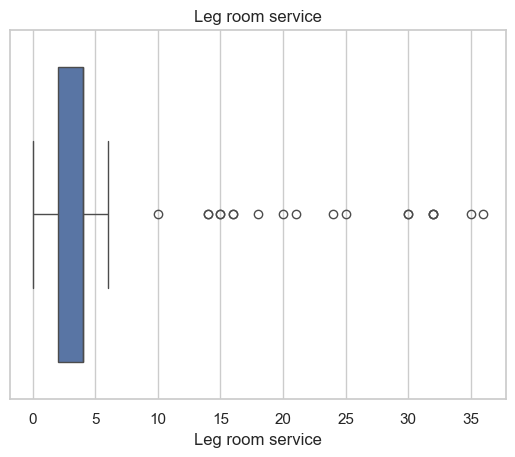

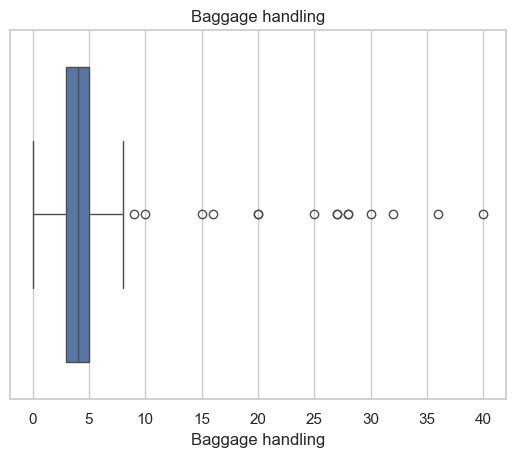

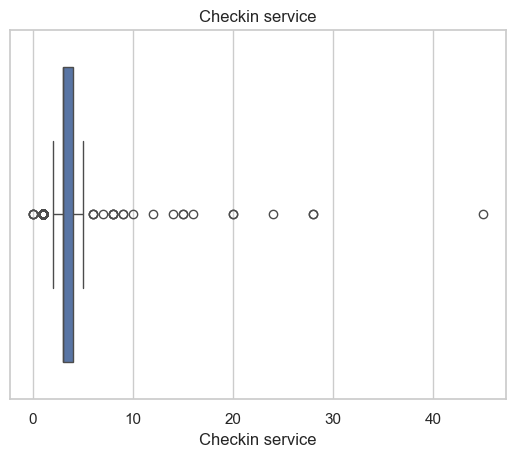

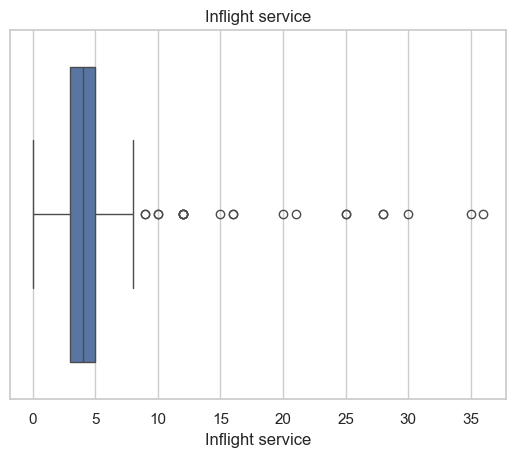

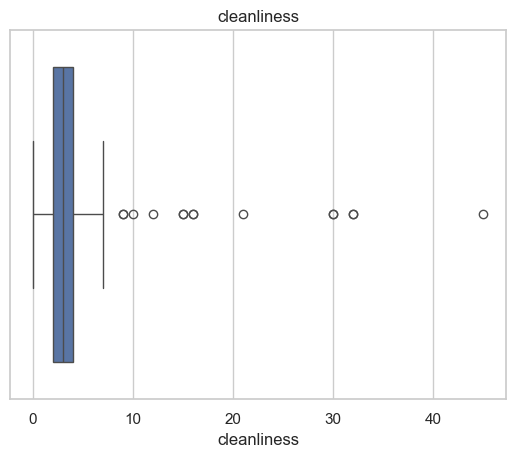

In [66]:
for col in X_train.columns:
    sns.boxplot(x=X_train[col])
    plt.title(col)
    plt.show()

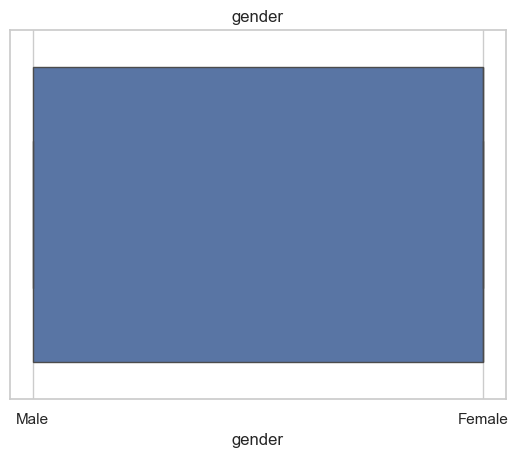

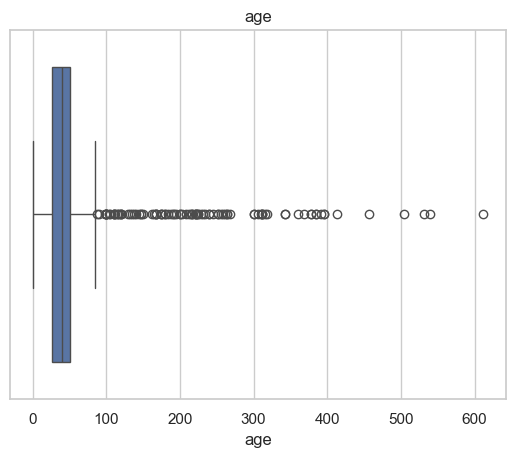

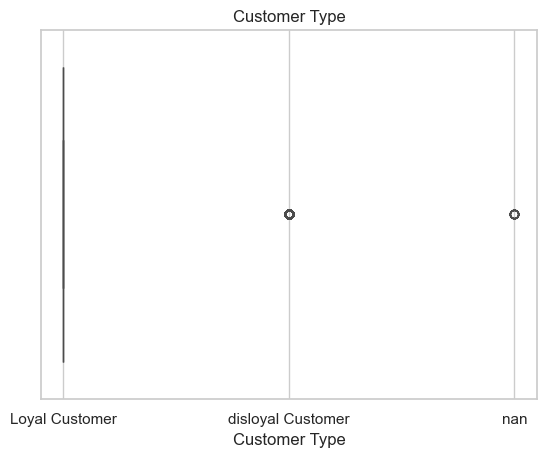

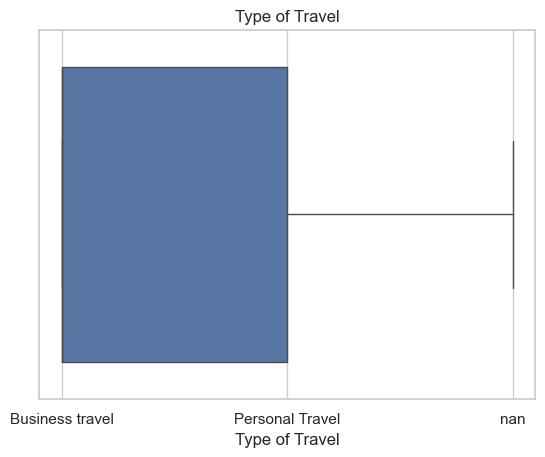

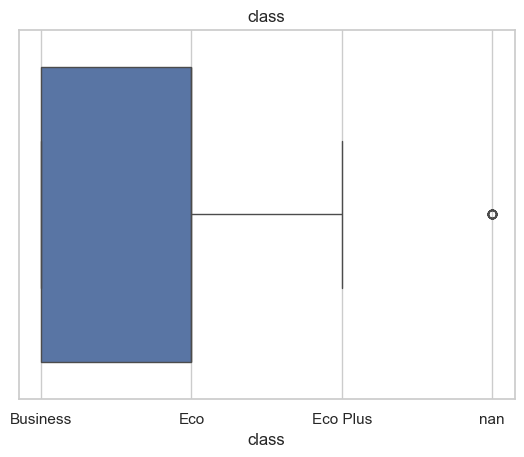

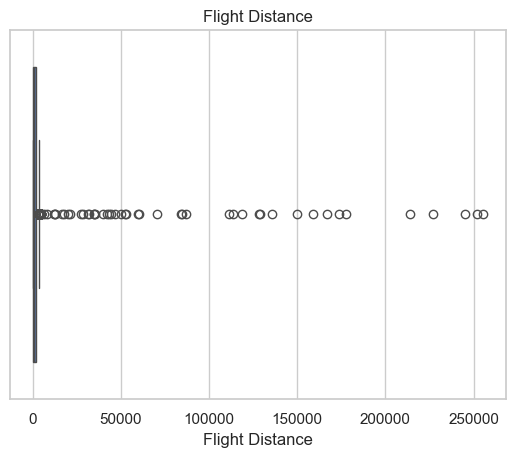

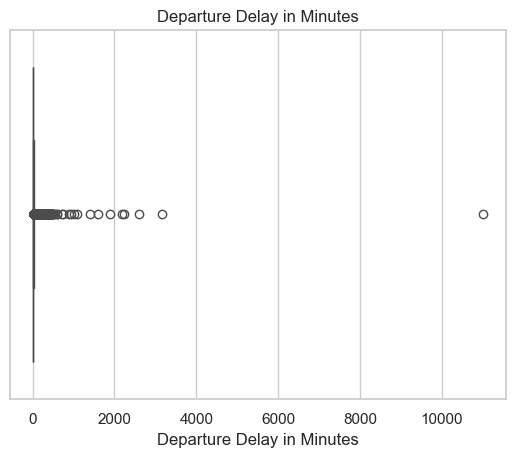

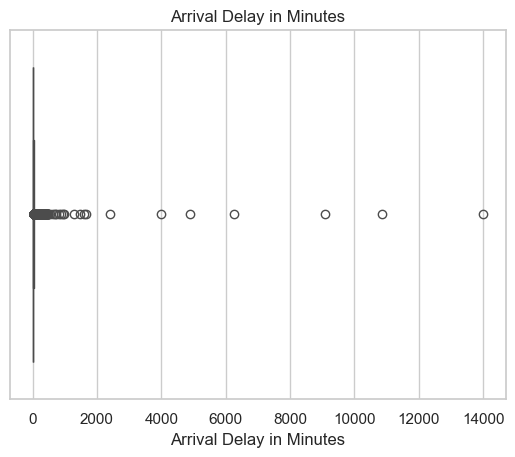

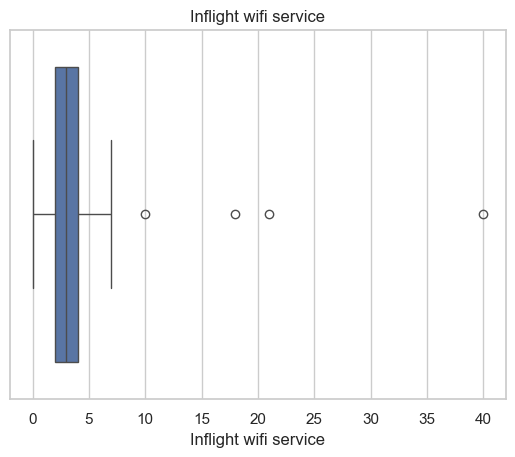

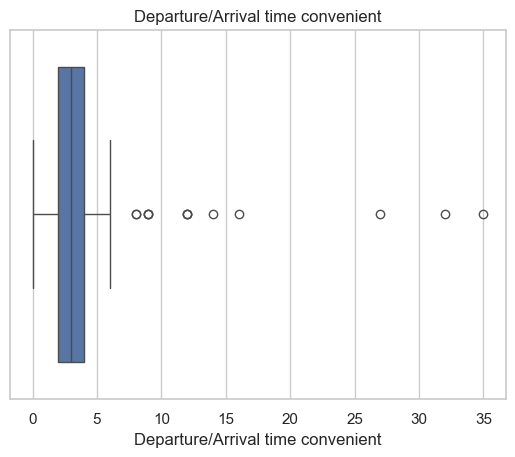

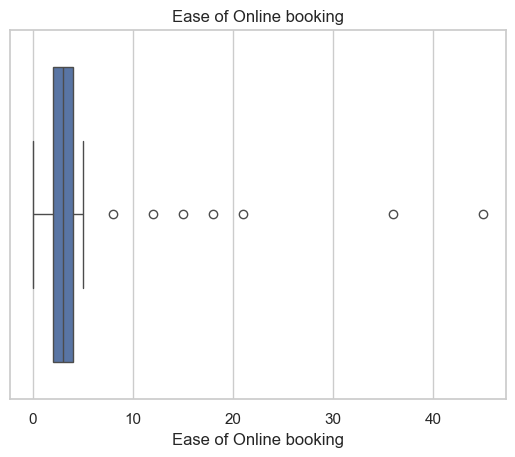

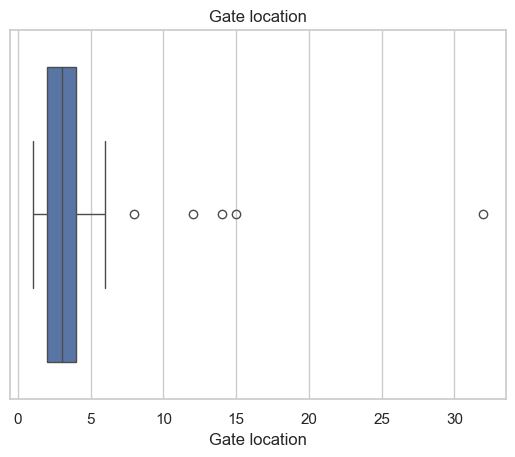

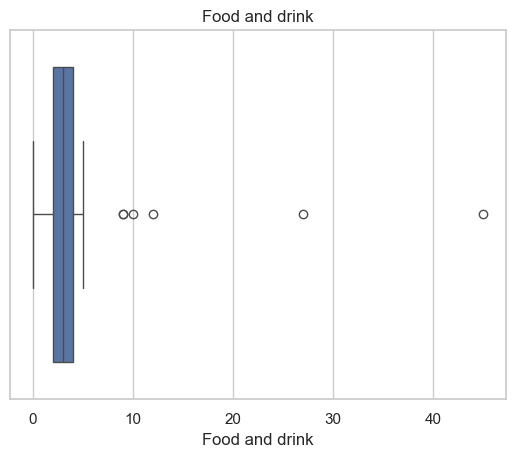

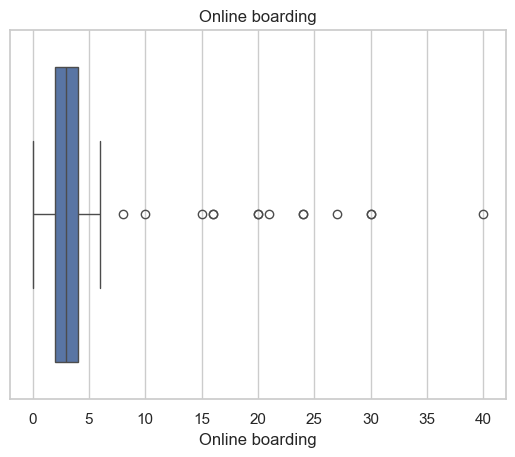

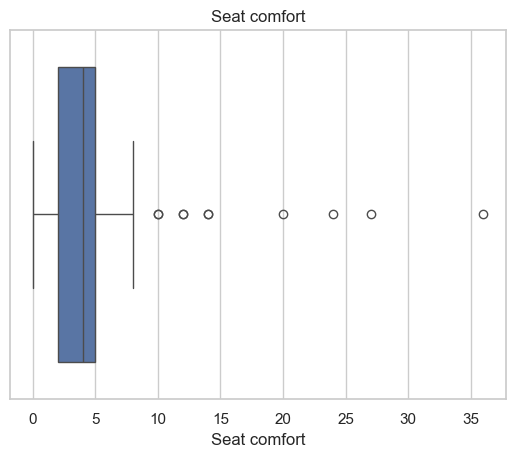

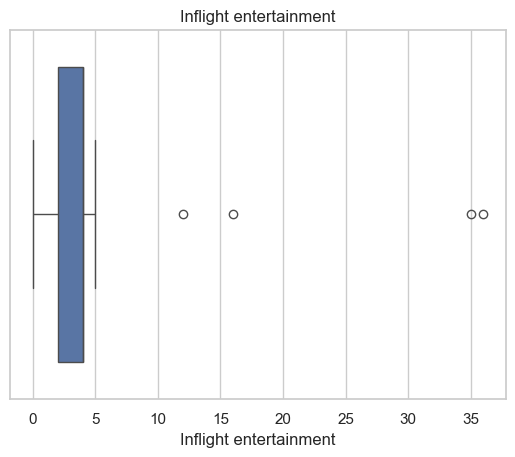

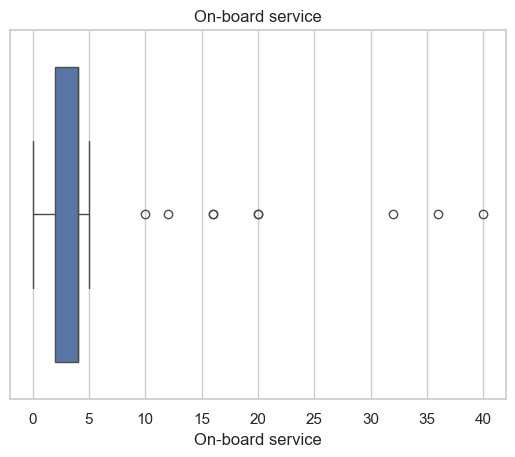

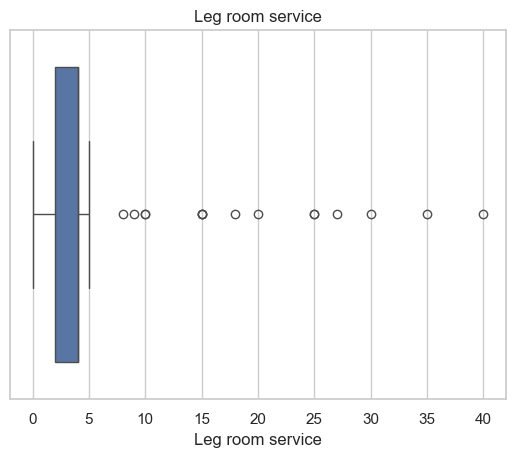

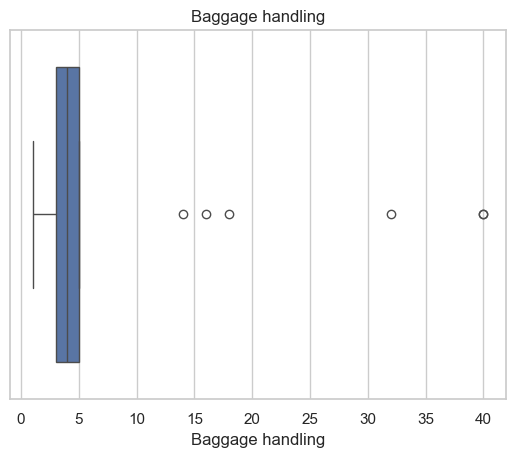

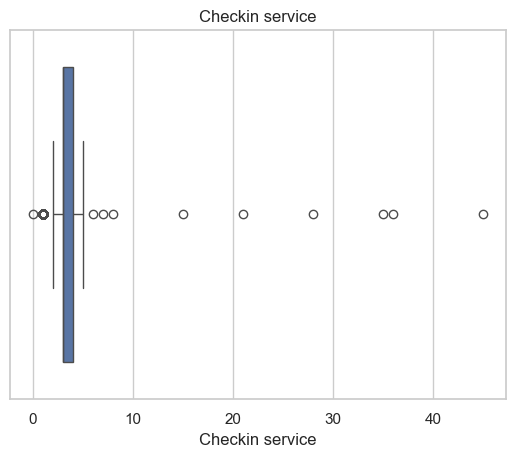

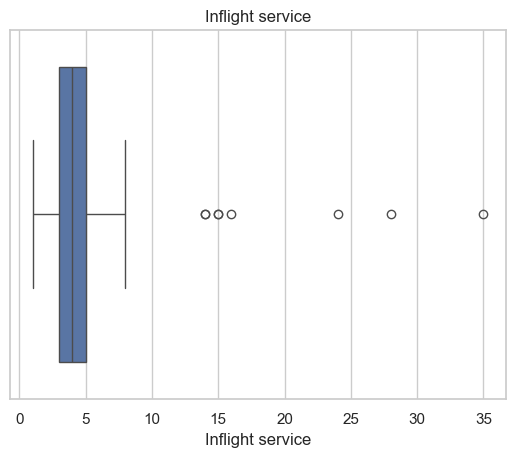

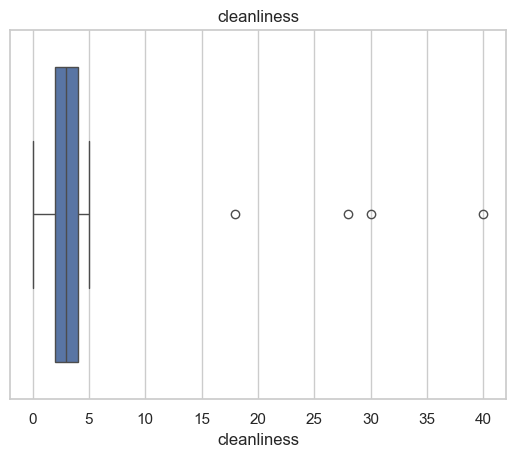

In [67]:
for col in X_val.columns:
    sns.boxplot(x=X_val[col])
    plt.title(col)
    plt.show()

In [68]:
X_val.isna().sum()

gender                                 0
age                                   76
Customer Type                          0
Type of Travel                         0
class                                  0
Flight Distance                       18
Departure Delay in Minutes            23
Arrival Delay in Minutes             111
Inflight wifi service                  9
Departure/Arrival time convenient     13
Ease of Online booking                 9
Gate location                         11
Food and drink                        13
Online boarding                       14
Seat comfort                          18
Inflight entertainment                12
On-board service                       9
Leg room service                      14
Baggage handling                      11
Checkin service                       12
Inflight service                      19
cleanliness                           10
dtype: int64

In [69]:
X_train.isna().sum()

gender                                 0
age                                  185
Customer Type                          0
Type of Travel                         0
class                                  0
Flight Distance                       54
Departure Delay in Minutes            61
Arrival Delay in Minutes             294
Inflight wifi service                 23
Departure/Arrival time convenient     28
Ease of Online booking                24
Gate location                         19
Food and drink                        22
Online boarding                       23
Seat comfort                          23
Inflight entertainment                30
On-board service                      23
Leg room service                      22
Baggage handling                      21
Checkin service                       22
Inflight service                      30
cleanliness                           21
dtype: int64

In [70]:
for col in X_train.columns:
    mode_value = X_train[col].mode()
    if X_train[col].dtype == object:
        X_train[col] = X_train[col].replace("nan", mode_value[0])
    X_train[col].fillna(mode_value[0], inplace=True)

for col in X_val.columns:
    mode_value = X_val[col].mode()
    if X_val[col].dtype == object:
        X_val[col] = X_val[col].replace("nan", mode_value[0])
    X_val[col].fillna(mode_value[0], inplace=True)

Сделайте **текстовый** вывод о распределениях значений признаков

In [93]:
X_train.describe(include=['object'])

,gender,Customer Type,Type of Travel,class
count,72550,72550,72550,72550
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,36816,59406,50054,34793


In [94]:
X_train.describe()

,age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
count,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000,72550.000000
mean,40.098856,1329.018332,15.859366,16.645968,2.733687,3.065017,2.761006,2.982688,3.209318,3.256513,3.445665,3.362150,3.383101,3.352364,3.630255,3.309056,3.640234,3.291178
std,20.658196,4764.369357,70.861937,97.990293,1.362172,1.552254,1.414843,1.316648,1.349963,1.372739,1.346077,1.360862,1.333758,1.360180,1.227853,1.293114,1.215114,1.343302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,544.000000,379620.000000,9282.000000,11760.000000,45.000000,45.000000,28.000000,36.000000,36.000000,32.000000,45.000000,40.000000,45.000000,36.000000,40.000000,45.000000,36.000000,45.000000


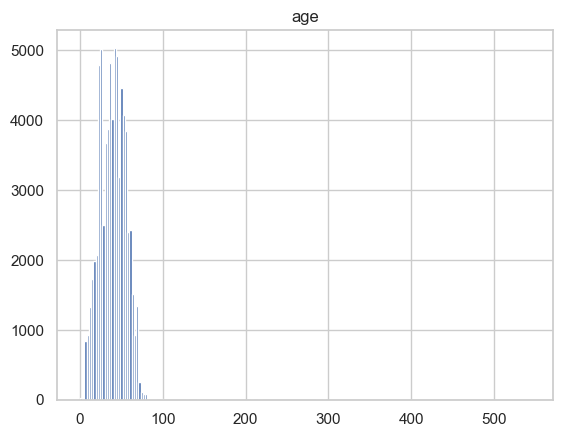

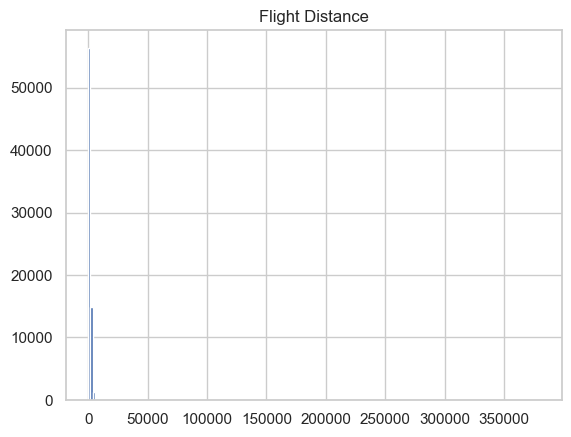

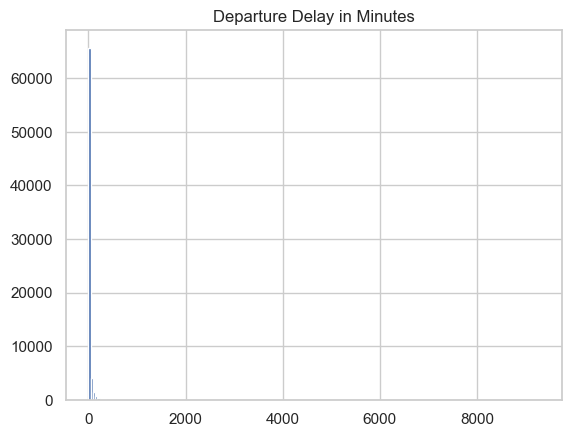

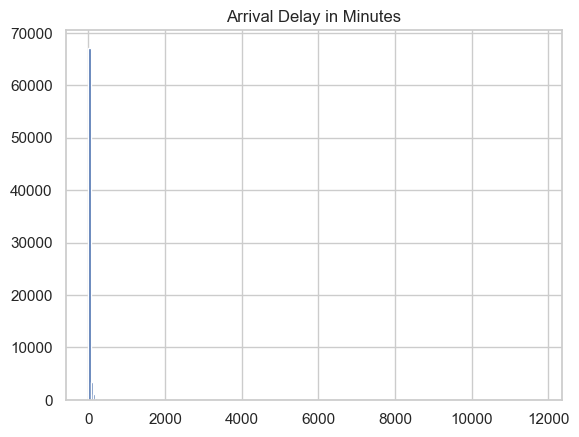

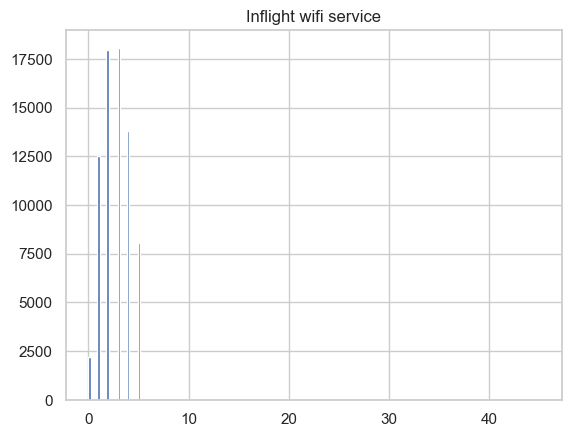

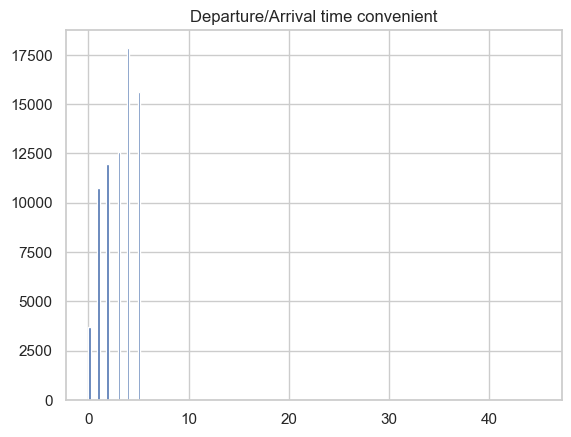

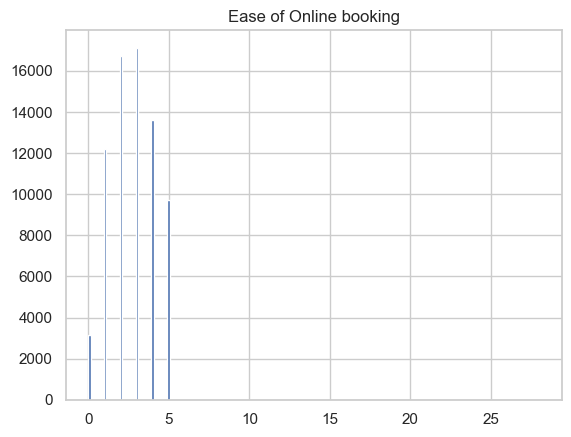

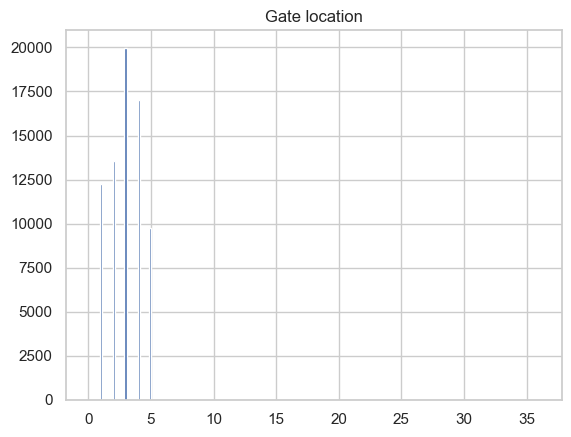

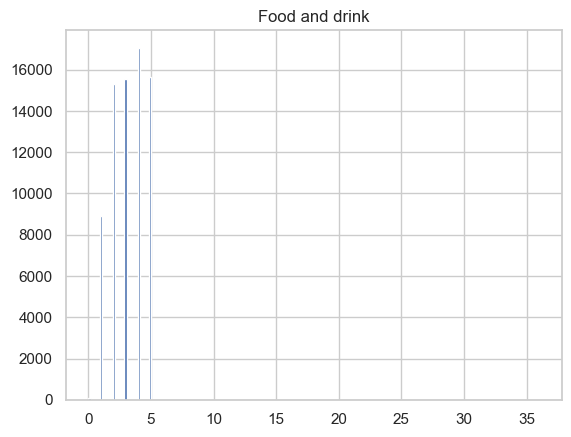

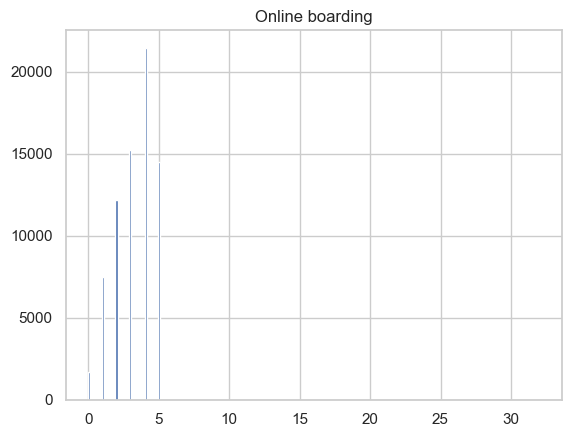

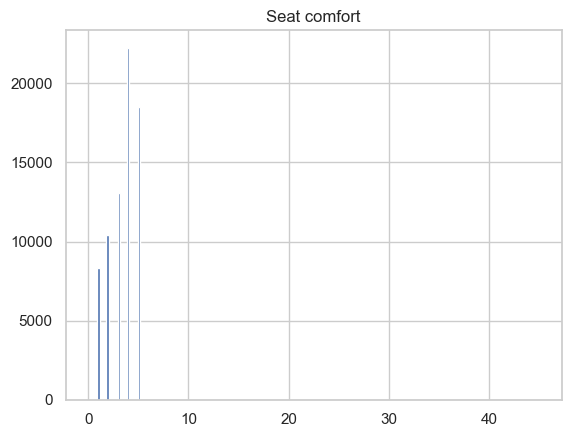

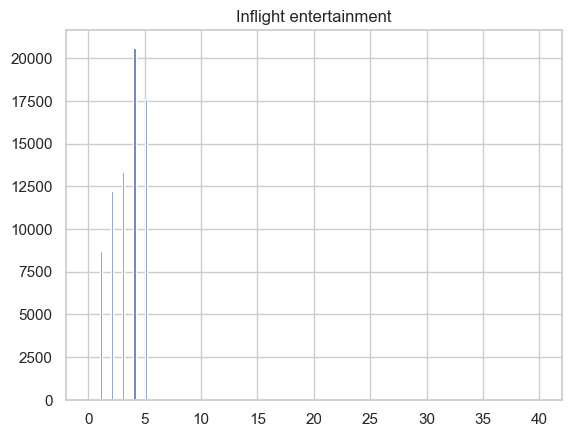

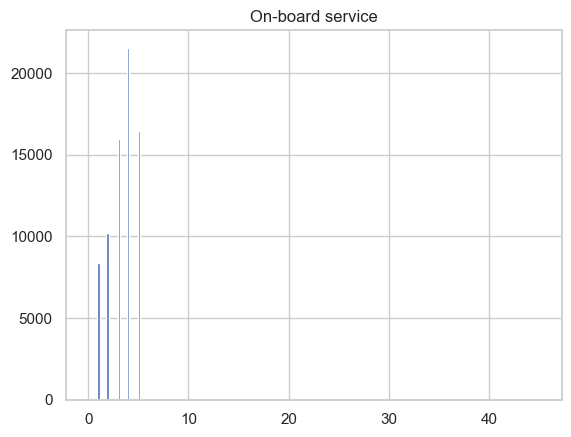

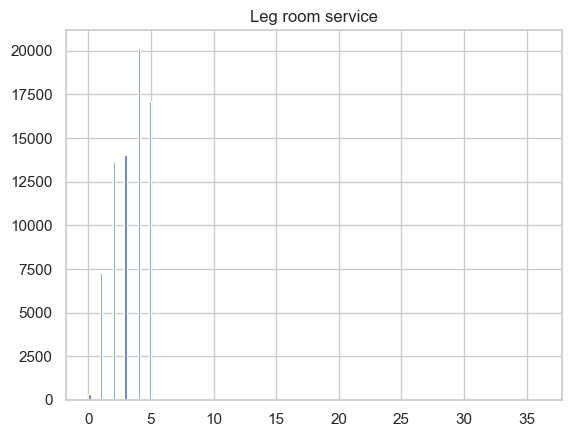

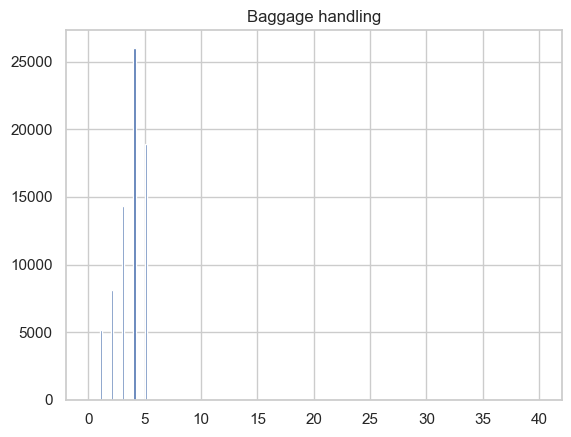

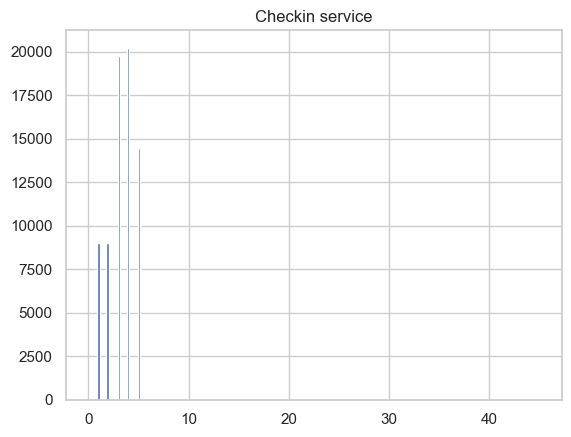

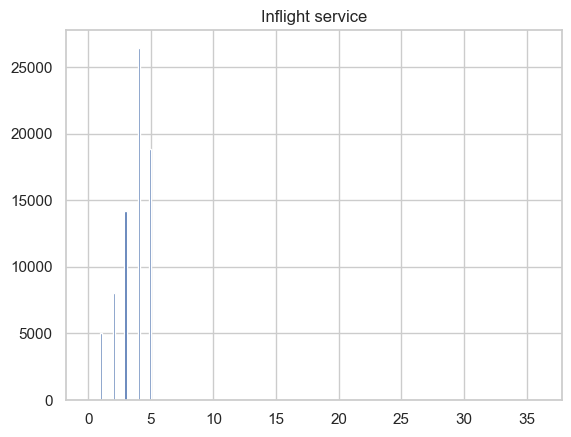

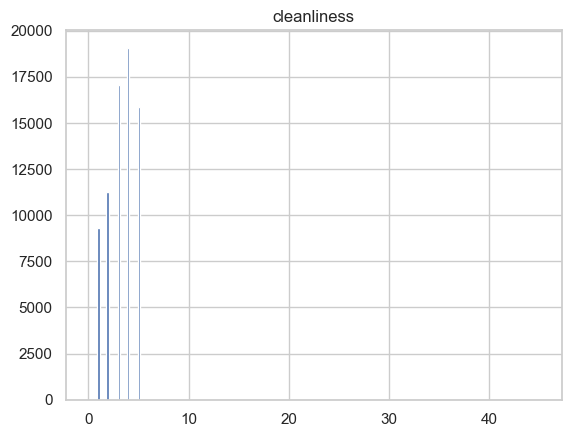

In [95]:
for col in X_train.loc[:, X_train.dtypes == float].columns:
    X_train[col].hist(bins=200)
    plt.title(col)
    plt.show()

Ответ: Столбецы age, Inflight wifi service - Seat comfort - стремятся к нормальному распределению, остальные признаки содержат большинство значений в первых 25% - 50%. Все признаки имеют значительные выбросы

In [96]:
X_val.describe(include=['object'])

,gender,Customer Type,Type of Travel,class
count,31094,31094,31094,31094
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,15774,25315,21457,14783


In [97]:
X_val.describe()

,age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness
count,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000
mean,39.955779,1316.469480,15.666945,16.871776,2.732231,3.064836,2.758989,2.978195,3.195215,3.252589,3.438477,3.359265,3.394578,3.367756,3.648775,3.306908,3.655303,3.286776
std,19.549492,4379.003672,80.658377,131.103562,1.348088,1.558570,1.439010,1.290490,1.358929,1.414625,1.356474,1.358533,1.337013,1.379536,1.224217,1.321872,1.204409,1.345356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,417.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,845.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,612.000000,255522.000000,11011.000000,14006.000000,40.000000,35.000000,45.000000,32.000000,45.000000,40.000000,36.000000,36.000000,40.000000,40.000000,40.000000,45.000000,35.000000,40.000000


### **Задание 11. (2 балла)**

Осуществите предобработку датасета для обучения **полностью самостоятельно**, на основе вашего опыта из прошлых дз и изученной теории. Обязательно **комментируйте** каждое действие.

**Примечание:**

В данном задании ваша задача в том числе убедить ревьюера в достаточности предобработки.

In [71]:
# Закодируем категориальные признаки при помощи Ohe-Hot-Encoder
one_hot_train = pd.get_dummies(X_train, columns=['gender', 'Customer Type', 'Type of Travel', 'class'], drop_first=True)

one_hot_val = pd.get_dummies(X_val, columns=['gender', 'Customer Type', 'Type of Travel', 'class'], drop_first=True)

In [72]:
# Удалин все объекты с выбросами age > 110 лет т.к. вероятно это ошибка системы и нет смысла рассматривать такие кейсы
one_hot_train = one_hot_train.drop(index=X_train.loc[X_train.age > 110, :].index)
one_hot_val = one_hot_val.drop(index=X_val.loc[X_val.age > 110, :].index)

In [73]:
y_train = y_train.apply(lambda x: 1 if x == "satisfied" else 0)

y_val= y_val.apply(lambda x: 1 if x == "satisfied" else 0)

In [74]:
y_train = y_train.drop(index=X_train.loc[X_train.age > 110, :].index)

y_val = y_val.drop(index=X_val.loc[X_val.age > 110, :].index)

In [ ]:
#На данном этапе данные готовы для использования, нам нет смысла убирать из остальных вещественных признаков выбросы т.к. мы не понижаем размерность пространства 
# и в целом выбросы не должны негативно сказаться на выборах порогов разбиения Решающих деревьев
# Также нет смысла нормировать данные т.к. выбор порога разбиения никак не зависит от шкалы измерения признака

### **Задание 12. (0.25 балла)**

- Обучите самописное дерево и Random Forest с базовыми гиперпараметрами. Выведите `f1-score`.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from hw4_code_pro import DecisionTree

In [76]:
model = RandomForestClassifier()

model.fit(X=one_hot_train, y=y_train)

RandomForestClassifier()

In [77]:
feature_types = ["real"] * 19 + ["categorical"] * 7
tree = DecisionTree(feature_types=feature_types, min_samples_split=3)

tree.fit(one_hot_train.to_numpy(), y_train.to_numpy())

DecisionTree(feature_types=['real', 'real', 'real', 'real', 'real', 'real',
                            'real', 'real', 'real', 'real', 'real', 'real',
                            'real', 'real', 'real', 'real', 'real', 'real',
                            'real', 'categorical', 'categorical', 'categorical',
                            'categorical', 'categorical', 'categorical',
                            'categorical'],
             min_samples_split=3)

In [78]:
print(f1_score(y_pred=model.predict(one_hot_val), y_true=y_val))

print(f1_score(y_pred=tree.predict(one_hot_val.to_numpy()), y_true=y_val.to_numpy()))

0.9543625180347787
0.9293427493180884


### **Задание 13. (0.4 баллa)**

- Попробуйте подобрать оптимальные гиперпараметры леса и дерева (если реализовали их в бонусе), используя [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).
- Сравните качество полученных моделей и выберите лучшую. Лучшую модель сохраните в pickle.

**Важно:**  

Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

In [152]:
distributions = dict(n_estimators=np.arange(50, 1000, 100),
                     min_samples_split=np.arange(10),
                    #  min_impurity_decrease=loguniform(1e-4, 0.1),
                     max_samples=uniform(0.05, 0.95),
                     criterion=["gini", "entropy", "log_loss"]
                    )

clf = RandomizedSearchCV(RandomForestClassifier(), distributions, scoring="f1", n_iter=30, cv=3)

search = clf.fit(one_hot_train, y_train)

In [153]:
search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': 0.9692138600687357,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 950,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
print(f1_score(y_pred=search.best_estimator_.predict(one_hot_val), y_true=y_val))

0.9547181279440814


In [151]:
print(f1_score(y_pred=model.predict(one_hot_val), y_true=y_val))

0.9538799969657893


In [155]:
# Обучаем финальную модель
X_train_final = pd.concat([one_hot_train, one_hot_val])
y_train_final = pd.concat([y_train, y_val])

In [156]:
best_model = RandomForestClassifier(**search.best_estimator_.get_params())

best_model.fit(X_train_final, y_train_final)

RandomForestClassifier(criterion='log_loss', max_samples=0.9692138600687357,
                       min_samples_split=6, n_estimators=950)

In [157]:
with open("model.pkl", 'wb') as file:
    pickle.dump(best_model, file)

### **Задание 14. Анализ моделей (0.1 балла)**

- Отобразите`feature_importances_` вашего лучшего случайного леса;
- Проанализируйте, какие признаки оказались важными?

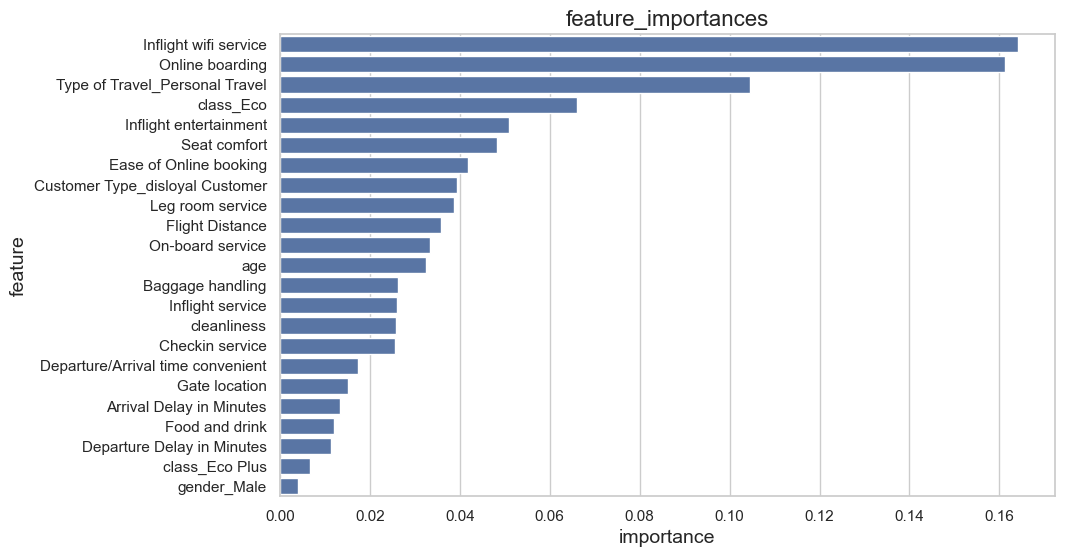

In [159]:
importances = best_model.feature_importances_
feature_names = one_hot_train.columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('feature_importances', fontsize=16)
plt.xlabel('importance', fontsize=14)
plt.ylabel('feature', fontsize=14)
plt.show()

Наиболее важными оказались признаки: online boarding, Inflight wifi service, personal travel. Наименее важный признак - gender

### **Задание 15. (0.25 балла)**
- Интерпретируйте важности признаков с помощью SHAP.
- Опишите полученый график

**Важно:** Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

**Вам может помочь:** [Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

In [214]:
import shap

In [162]:
X_test_sample = df_test.sample(n=1000)

for col in X_test_sample.select_dtypes(include='object').columns:
    try:
        X_test_sample[col] = X_test_sample[col].astype(float)
    except:
        print("X_test_sample", col, "is not numeric")

for col in X_test_sample.columns:
    mode_value = X_test_sample[col].mode()
    if X_test_sample[col].dtype == object:
        X_test_sample[col] = X_test_sample[col].replace("nan", mode_value[0])
    X_test_sample[col].fillna(mode_value[0], inplace=True)

one_hot_sample = pd.get_dummies(X_test_sample, columns=['gender', 'Customer Type', 'Type of Travel', 'class'], drop_first=True)
one_hot_sample = one_hot_sample.drop(index=X_test_sample.loc[X_test_sample.age > 110, :].index)

X_test_sample gender is not numeric
X_test_sample Customer Type is not numeric
X_test_sample Type of Travel is not numeric
X_test_sample class is not numeric


In [164]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(one_hot_sample)

<Figure size 640x480 with 0 Axes>

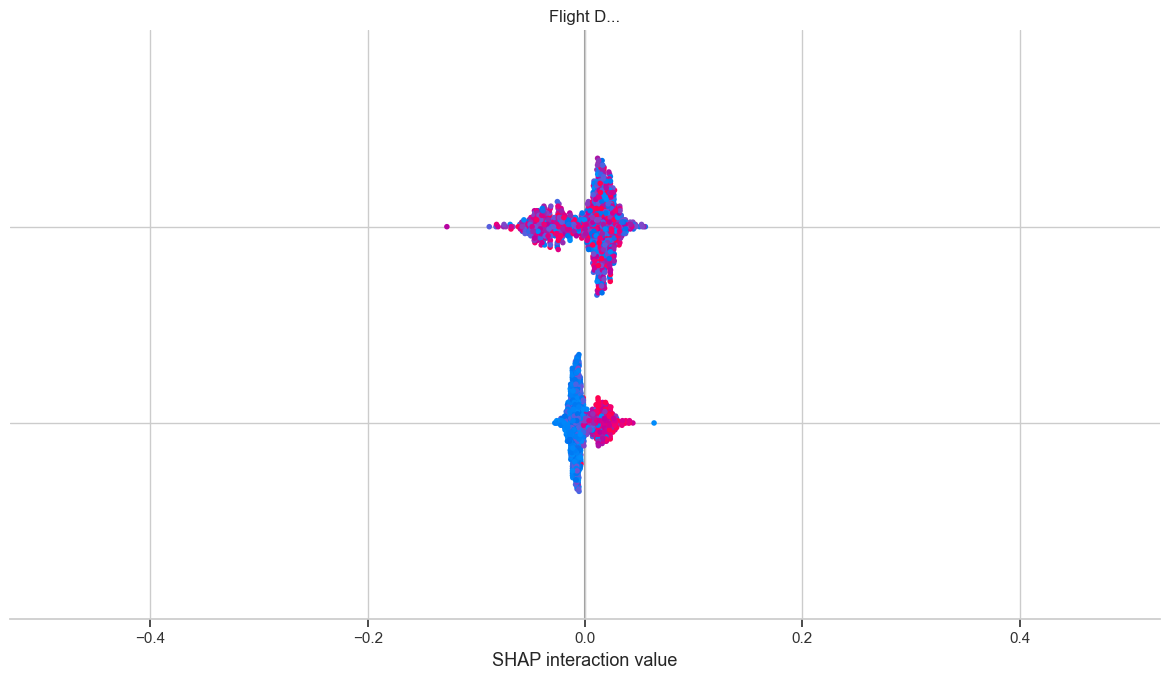

In [175]:
shap.summary_plot(shap_values, one_hot_sample)

In [ ]:
shap.dependence_plot("age", shap_values, one_hot_sample)

`Ваш ответ здесь. `

### **Задание 16. (0.25 балла)**

- Интерпретируйте важности признаков для одного прогноза с помощью LIME;
- Опишите полученный график для выбранного наблюдения

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

## Котобонус!

0.25 балла

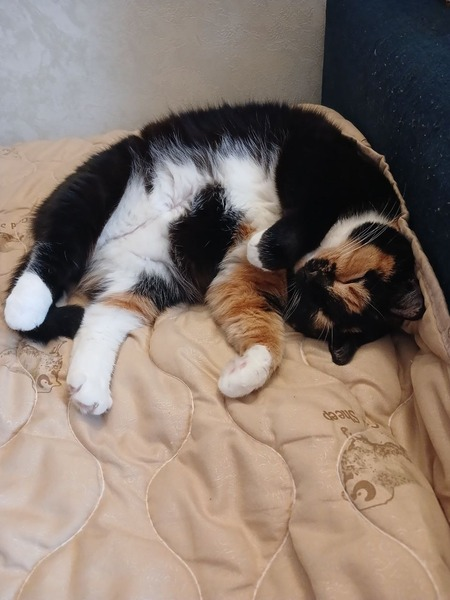

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?